In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from utils import plot_batch, calculate_loss_and_accuracy
from FruitModel import FruitModel

In [5]:
model = FruitModel()
model.load_state_dict(torch.load('models/fruit_net.pt'))
model = model.cuda()

In [15]:
validation_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [16]:
validation_data = ImageFolder('fruit_test', validation_transforms)

In [17]:
validation_loader = DataLoader(validation_data, batch_size=1, num_workers=0, shuffle=True)

In [18]:
batch, labels = next(iter(validation_loader))

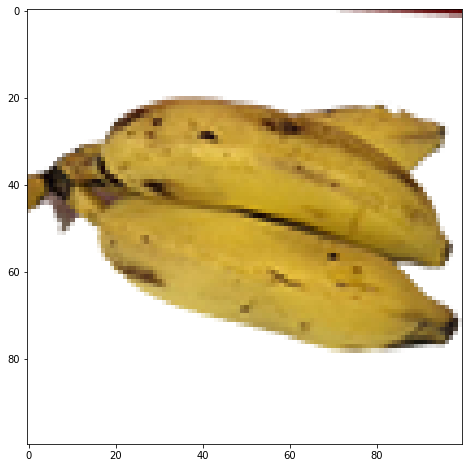

In [19]:
plot_batch(batch[:9], 1, 1)

In [27]:
_, idx = torch.topk(model(batch.cuda()), 1, axis=1)

In [28]:
idx

tensor([[116]], device='cuda:0')

In [31]:
ans = model(batch.cuda())

In [34]:
ans[0][116]

tensor(0., device='cuda:0', grad_fn=<SelectBackward>)